# Vision Transformer with Pytorch (CPU)

# Validate

In [38]:
import torch
from transformers import ViTForImageClassification
import pytorch_lightning as pl
import torch.nn as nn

In [39]:
num_classes = 100

In [9]:
class Modelo(pl.LightningModule):
    def __init__(self):
        super(Modelo, self).__init__()
        # Carregar um modelo pré-treinado
        self.model =  ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=1, ignore_mismatched_sizes=True)
        
        # Congelar os pesos das camadas pré-treinadas
        for param in self.model.parameters():
            param.requires_grad = False
        
        # Substituir a última camada para um problema binário
        self.model.classifier = nn.Sequential(
            nn.Linear(self.model.config.hidden_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )
        self.sigmoid = nn.Sigmoid()

        # Função de perda
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self, x):
        logits = self.model(x).logits
        return logits

    def training_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels.float().unsqueeze(1)) 
        probabilities = self.sigmoid(logits)
        predicted = torch.round(probabilities)
        accuracy = (predicted == labels.unsqueeze(1)).float().mean()
                
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_accuracy', accuracy, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels.float().unsqueeze(1)) 
        probabilities = self.sigmoid(logits)
        predicted = torch.round(probabilities)
        accuracy = (predicted == labels.unsqueeze(1)).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_accuracy', accuracy, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        return optimizer
      


In [40]:
class Modelo(pl.LightningModule):
    def __init__(self):
        super(Modelo, self).__init__()
        # Carregar um modelo pré-treinado
        self.model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=num_classes, ignore_mismatched_sizes=True)
        print(self.model)
        print("----------------------------------------------------------------")
        # Congelar os pesos das camadas pré-treinadas
        for param in self.model.parameters():
            param.requires_grad = False
        
        # Substituir a última camada para um problema de 4 classes
        self.model.classifier = nn.Sequential(
            nn.Linear(self.model.config.hidden_size, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

        # Função de perda para classificação multiclasse
        self.criterion = nn.CrossEntropyLoss()
        print(self.model)
        print("----------------------------------------------------------------")
        # for name, module in self.model.named_modules():
        #   print(f"{name}: {module}")

    def forward(self, x):
        logits = self.model(x).logits
        return logits

    def training_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels)
        _, predicted = torch.max(logits, 1)
        accuracy = (predicted == labels).float().mean()
                
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_accuracy', accuracy, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images)
        loss = self.criterion(logits, labels)
        _, predicted = torch.max(logits, 1)
        accuracy = (predicted == labels).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_accuracy', accuracy, on_epoch=True, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        return optimizer

In [41]:
# Instancie o modelo
model = Modelo()

# Carregue o estado do modelo salvo
model.load_state_dict(torch.load('./models/modelo_vit_gpu.pth'))
model.eval() 

d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\TCC1\VIT-dog-cat\env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([100]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([100, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

Modelo(
  (model): ViTForImageClassification(
    (vit): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0-11): 12 x ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (intermed

In [24]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def get_key_from_value(dicte, target_value):
    for key, value in dicte.items():
        if value == target_value:
            return key
    return None

def avaliarModelo(path_paste):
  all_files_and_dirs = os.listdir(path_paste)

  # Filtra apenas os arquivos
  files = [f for f in all_files_and_dirs if os.path.isfile(os.path.join(path_paste, f))]

  for i, file in enumerate(files):
    
    
    image_path = f"{path_paste}/{file}"
    image = Image.open(image_path).convert('RGB')

    # Transforme a imagem
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image_tensor = transform(image).unsqueeze(0)  # Adicione uma dimensão para o batch

    # Certifique-se de que o modelo está em modo de avaliação
    model.eval()

    with torch.no_grad():
        # Faça a previsão
        output = model(image_tensor)
        probabilities = torch.sigmoid(output)
        prediction = torch.round(probabilities).item()

    # Exibir a imagem
    plt.imshow(image)
    plt.axis('off')  # Não exibir os eixos
    
    
    dicte = {'0001_Bulbasaur': 0, '0004_Charmander': 1, '0007_Squirtle': 2, '0017_Pidgeotto': 3}
    
    retorno = get_key_from_value(dicte=dicte, target_value=prediction)
    
    plt.title(f'Predicted class: {retorno}')
    print(prediction)
    plt.show()
    
    if i == 15:
      break


In [47]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def get_key_from_value(dicte, target_value):
    for key, value in dicte.items():
        if value == target_value:
            return key
    return None

def avaliarModelo(path_paste):
  all_files_and_dirs = os.listdir(path_paste)

  # Filtra apenas os arquivos
  files = [f for f in all_files_and_dirs if os.path.isfile(os.path.join(path_paste, f))]

  for i, file in enumerate(files):
    
    
    image_path = f"{path_paste}/{file}"
    image = Image.open(image_path).convert('RGB')

    # Transforme a imagem
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image_tensor = transform(image).unsqueeze(0)  # Adicione uma dimensão para o batch

    # Certifique-se de que o modelo está em modo de avaliação
    model.eval()

    with torch.no_grad():
      # Faça a previsão
      output = model(image_tensor)
      probabilities = torch.softmax(output, dim=1)
      prediction = torch.argmax(probabilities, dim=1).item()

    # Exibir a imagem
    plt.imshow(image)
    plt.axis('off')  # Não exibir os eixos
    
    
    dicte = {'0001_Bulbasaur': 0, '0002_Ivysaur': 1, '0003_Venusaur': 2, '0004_Charmander': 3, '0005_Charmeleon': 4, '0006_Charizard': 5, '0007_Squirtle': 6, '0008_Wartortle': 7, '0009_Blastoise': 8, '0010_Caterpie': 9, '0011_Metapod': 10, '0012_Butterfree': 11, '0013_Weedle': 12, '0014_Kakuna': 13, '0015_Beedrill': 14, '0016_Pidgey': 15, '0017_Pidgeotto': 16, '0018_Pidgeot': 17, '0019_Rattata': 18, '0020_Raticate': 19, '0021_Spearow': 20, '0022_Fearow': 21, '0023_Ekans': 22, '0024_Arbok': 23, '0025_Pikachu': 24, '0026_Raichu': 25, '0027_Sandshrew': 26, '0028_Sandslash': 27, '0029_Nidoran female': 28, '0030_Nidorina': 29, '0031_Nidoqueen': 30, '0032_Nidoran male': 31, '0033_Nidorino': 32, '0034_Nidoking': 33, '0035_Clefairy': 34, '0036_Clefable': 35, '0037_Vulpix': 36, '0038_Ninetales': 37, '0039_Jigglypuff': 38, '0040_Wigglytuff': 39, '0041_Zubat': 40, '0042_Golbat': 41, '0043_Oddish': 42, '0044_Gloom': 43, '0045_Vileplume': 44, '0046_Paras': 45, '0047_Parasect': 46, '0048_Venonat': 47, '0049_Venomoth': 48, '0050_Diglett': 49, '0051_Dugtrio': 50, '0052_Meowth': 51, '0053_Persian': 52, '0054_Psyduck': 53, '0055_Golduck': 54, '0056_Mankey': 55, '0057_Primeape': 56, '0058_Growlithe': 57, '0059_Arcanine': 58, '0060_Poliwag': 59, '0061_Poliwhirl': 60, '0062_Poliwrath': 61, '0063_Abra': 62, '0064_Kadabra': 63, '0065_Alakazam': 64, '0066_Machop': 65, '0067_Machoke': 66, '0068_Machamp': 67, '0069_Bellsprout': 68, '0070_Weepinbell': 69, '0071_Victreebel': 70, '0072_Tentacool': 71, '0073_Tentacruel': 72, '0074_Geodude': 73, '0075_Graveler': 74, '0076_Golem': 75, '0077_Ponyta': 76, '0078_Rapidash': 77, '0079_Slowpoke': 78, '0080_Slowbro': 79, '0081_Magnemite': 80, '0082_Magneton': 81, '0083_Farfetchd': 82, '0084_Doduo': 83, '0085_Dodrio': 84, '0086_Seel': 85, '0087_Dewgong': 86, '0088_Grimer': 87, '0089_Muk': 88, '0090_Shellder': 89, '0091_Cloyster': 90, '0092_Gastly': 91, '0093_Haunter': 92, '0094_Gengar': 93, '0095_Onix': 94, '0096_Drowzee': 95, '0097_Hypno': 96, '0098_Krabby': 97, '0099_Kingler': 98, '0100_Voltorb': 99}
    
    retorno = get_key_from_value(dicte=dicte, target_value=prediction)
    
    plt.title(f'Predicted class: {retorno}')
    plt.show()
    
    if i == 15:
      break


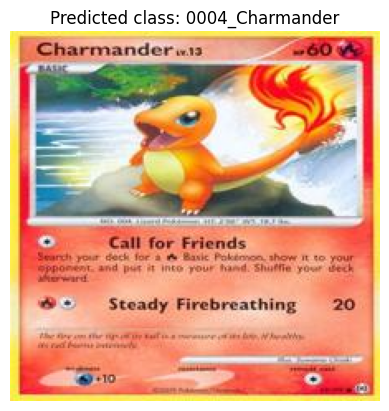

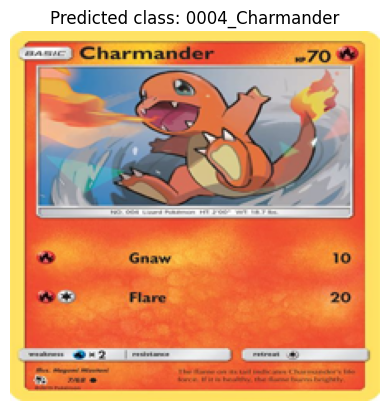

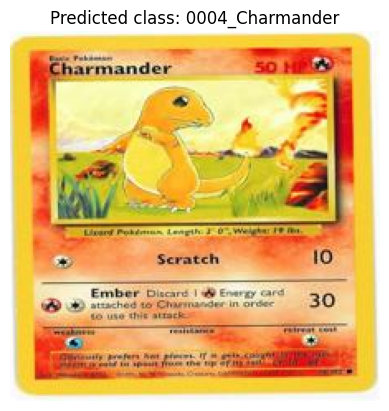

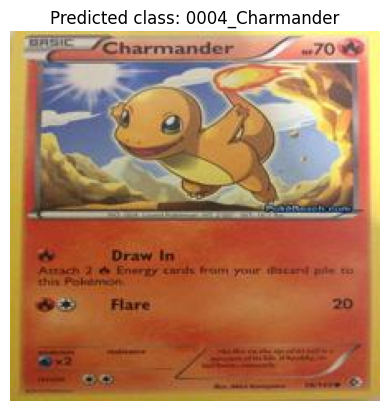

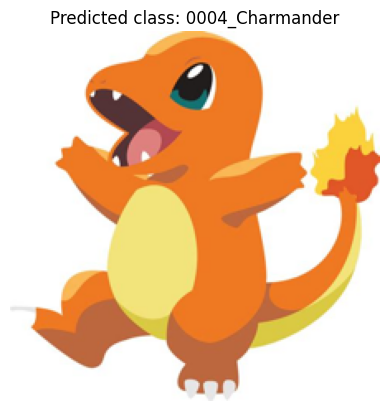

In [48]:
avaliarModelo("./data/pokemon/dataset_treino_e_teste/validation/0004_Charmander")

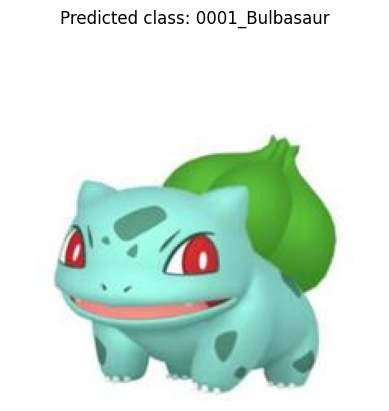

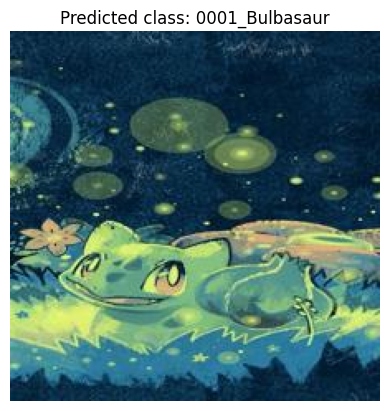

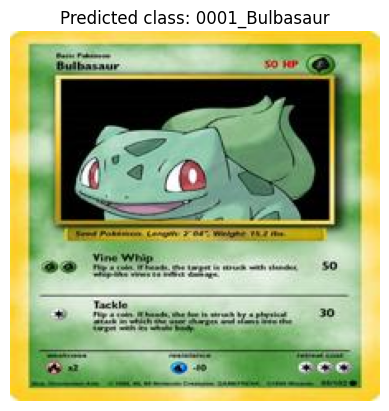

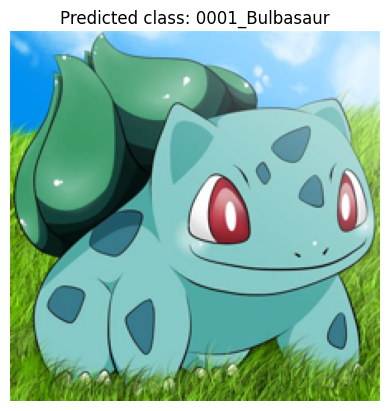

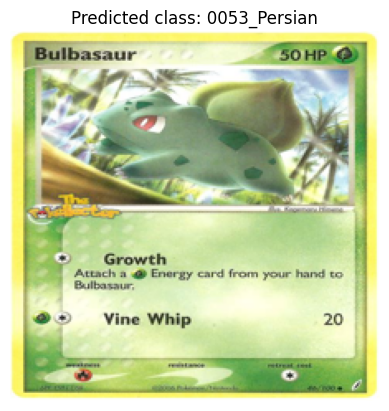

In [49]:
avaliarModelo("./data/pokemon/dataset_treino_e_teste/validation/0001_Bulbasaur/")

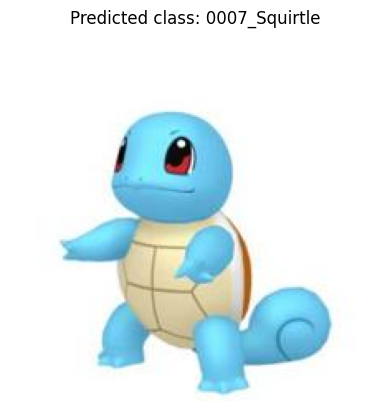

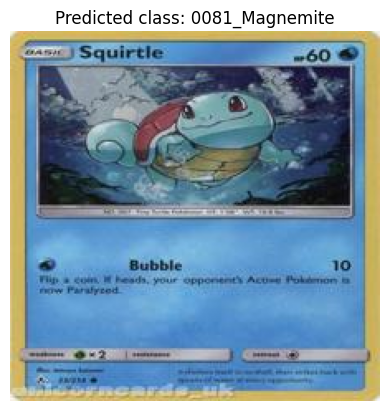

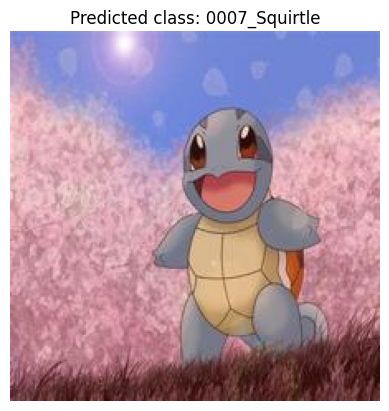

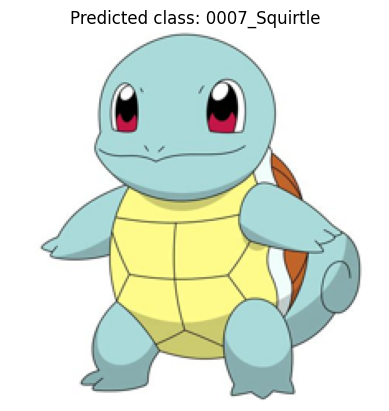

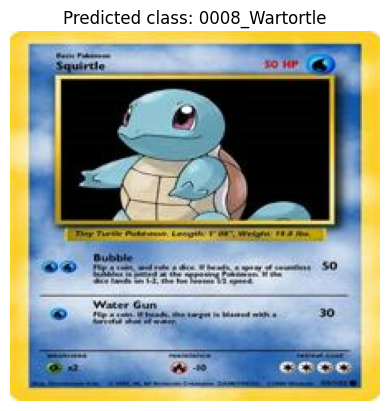

In [50]:
avaliarModelo("./data/pokemon/dataset_treino_e_teste/validation/0007_Squirtle/")

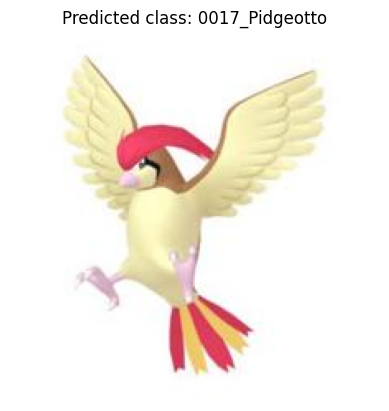

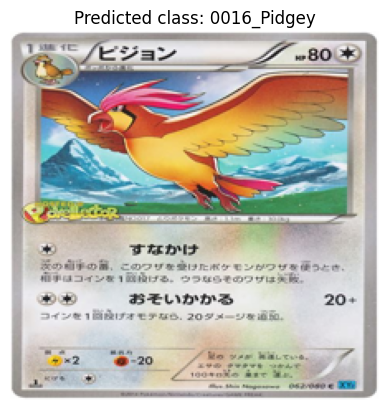

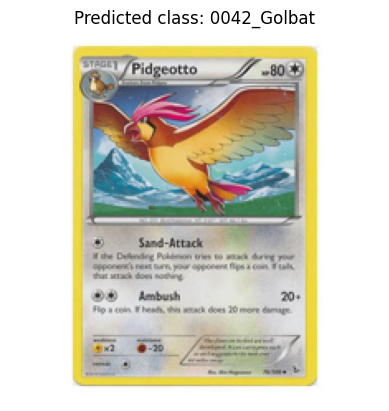

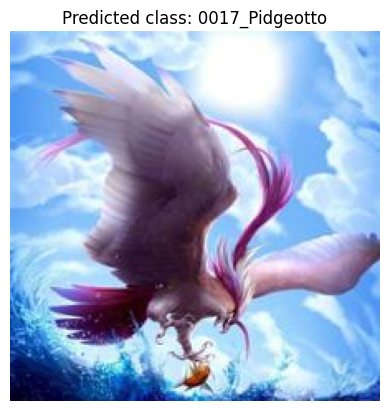

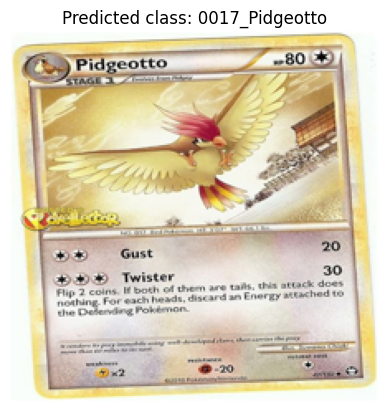

In [51]:
avaliarModelo("./data/pokemon/dataset_treino_e_teste/validation/0017_Pidgeotto/")